In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'assignment-1_dataset/properties.csv'
real_estate_data = pd.read_csv(file_path)

selected_columns = ['City', 'Type of Property', 'Price', 'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']
real_estate_data_cleaned = real_estate_data[selected_columns].dropna(subset=['Price', 'City', 'Type of Property'])

real_estate_data_cleaned['Price'] = pd.to_numeric(real_estate_data_cleaned['Price'], errors='coerce')

city_property_summary = real_estate_data_cleaned.groupby(['City', 'Type of Property']).agg({'Price': ['mean', 'count']}).reset_index()

city_property_summary.columns = ['City', 'Property Type', 'Average Price', 'Property Count']

/tmp/ipykernel_424214/3181110304.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv(file_path)


## Question 1

/tmp/ipykernel_424214/3993868444.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_distribution = real_estate_data_cleaned.groupby(['City', 'Price Range']).size().reset_index(name='Count')


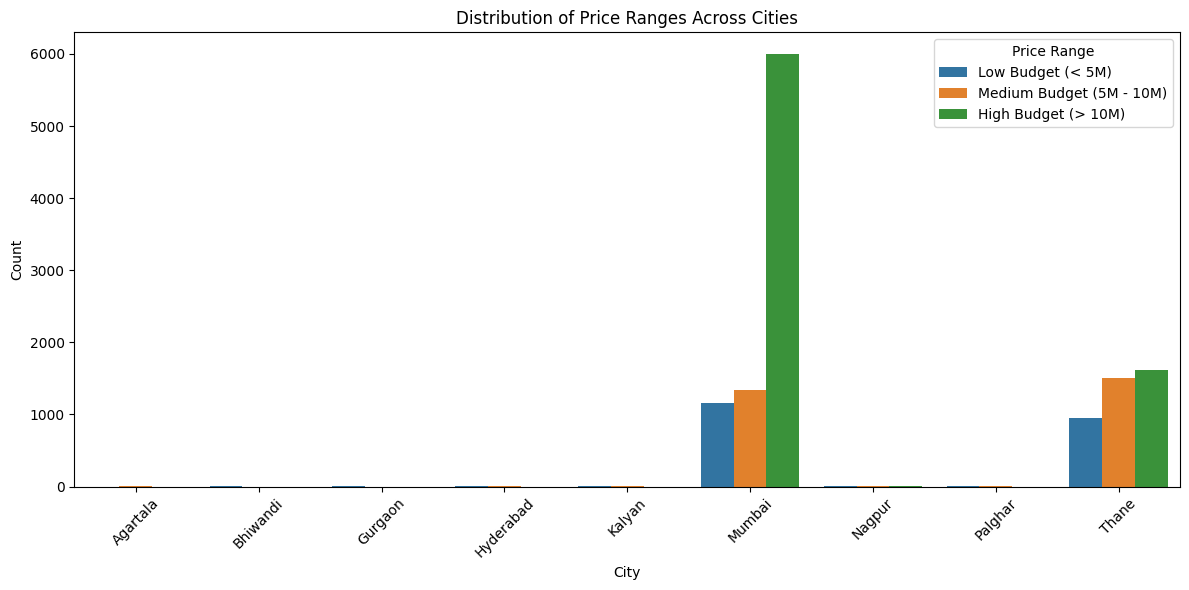

In [31]:

price_bins = [0, 5000000, 10000000, float('inf')] 
price_labels = ['Low Budget (< 5M)', 'Medium Budget (5M - 10M)', 'High Budget (> 10M)']

real_estate_data_cleaned['Price Range'] = pd.cut(real_estate_data_cleaned['Price'], bins=price_bins, labels=price_labels)

price_range_distribution = real_estate_data_cleaned.groupby(['City', 'Price Range']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Count', hue='Price Range', data=price_range_distribution)
plt.title('Distribution of Price Ranges Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Question 2:

/tmp/ipykernel_424214/585287662.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv(file_path)


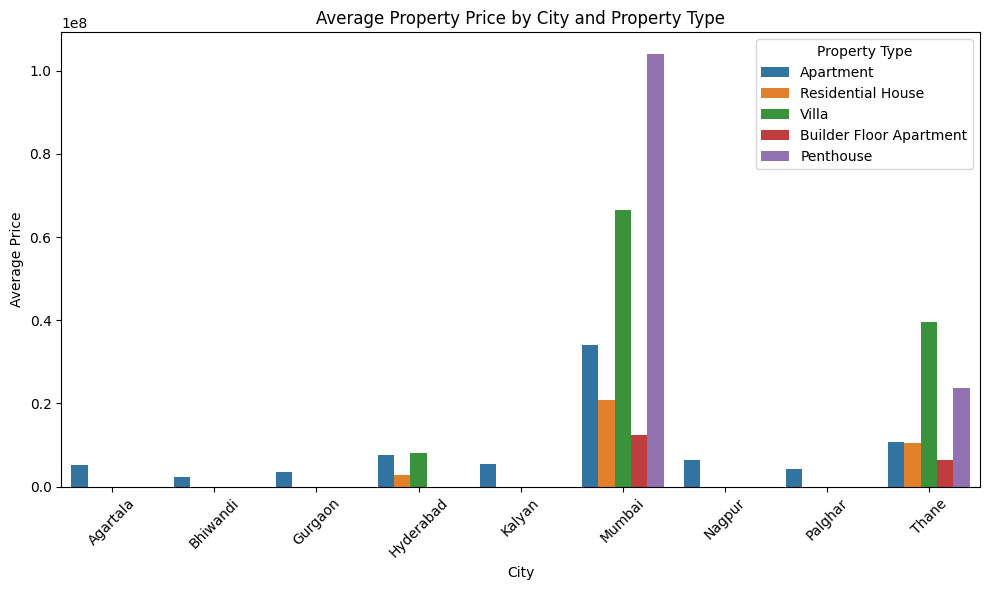

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'assignment-1_dataset/properties.csv'
real_estate_data = pd.read_csv(file_path)

selected_columns = ['City', 'Type of Property', 'Price', 'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']
real_estate_data_cleaned = real_estate_data[selected_columns].dropna(subset=['Price', 'City', 'Type of Property'])

real_estate_data_cleaned['Price'] = pd.to_numeric(real_estate_data_cleaned['Price'], errors='coerce')

city_property_summary = real_estate_data_cleaned.groupby(['City', 'Type of Property']).agg({'Price': ['mean', 'count']}).reset_index()

city_property_summary.columns = ['City', 'Property Type', 'Average Price', 'Property Count']

# Visualization: Bar chart of average price by city and property type
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Average Price', hue='Property Type', data=city_property_summary)
plt.title('Average Property Price by City and Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

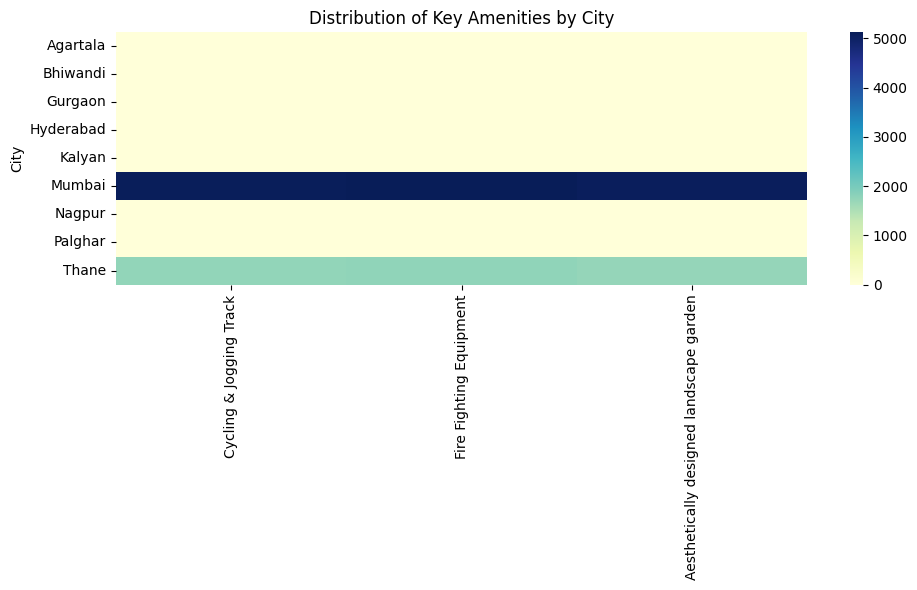

In [33]:
amenities_columns = [
    'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden', 
    'Swimming Pool', 'Gymnasium', 'Club House', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 
    'Security', 'Water Storage', 'Private Terrace/Garden', 'Visitor Parking', 'Intercom Facility', 
    'Maintenance Staff', 'Waste Disposal', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 
    'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Indoor Squash & Badminton Courts', 
    'Kids Play Area', 'Library', 'Meditation Area', 'Multipurpose Courts', 'Recreational Pool'
]

amenities_columns = [col for col in amenities_columns if col in real_estate_data_cleaned.columns]


amenities_summary = real_estate_data_cleaned.groupby(['City']).agg({amenity: 'sum' for amenity in amenities_columns}).reset_index()

amenities_summary.fillna(0, inplace=True)

# Visualization 2: Heatmap for amenities distribution by city
plt.figure(figsize=(10, 6))
sns.heatmap(amenities_summary.set_index('City'), cmap="YlGnBu")
plt.title('Distribution of Key Amenities by City')
plt.tight_layout()
plt.show()
# 

## Question 4

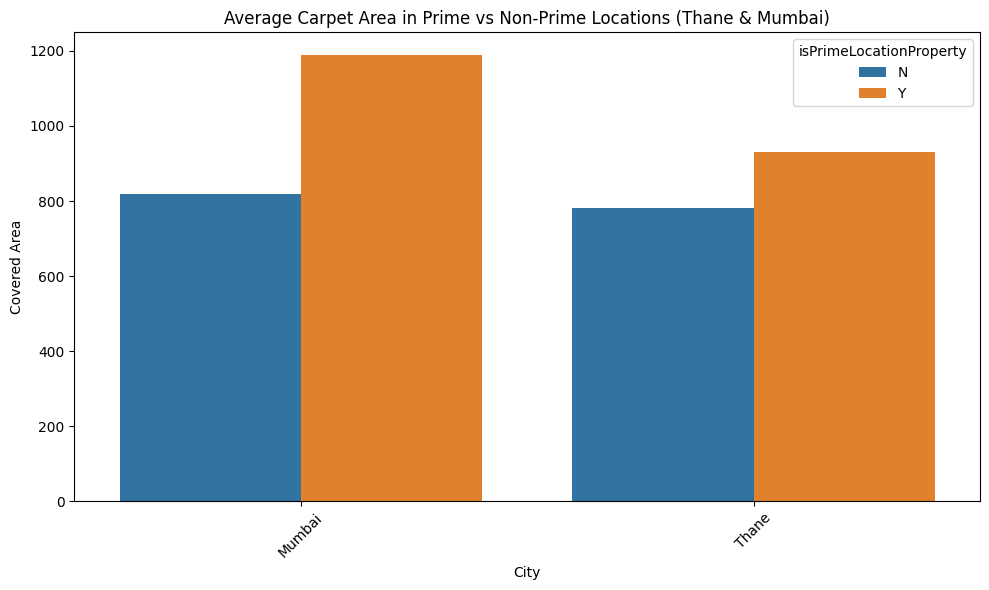

In [34]:
thane_mumbai_prime_nonprime = real_estate_data[real_estate_data['City'].isin(['Thane', 'Mumbai'])][['City', 'isPrimeLocationProperty', 'Price', 'Covered Area']]

thane_mumbai_prime_nonprime['Covered Area'] = pd.to_numeric(thane_mumbai_prime_nonprime['Covered Area'], errors='coerce')
thane_mumbai_prime_nonprime['Price'] = pd.to_numeric(thane_mumbai_prime_nonprime['Price'], errors='coerce')

prime_nonprime_summary = thane_mumbai_prime_nonprime.groupby(['City', 'isPrimeLocationProperty']).agg({
    'Price': 'mean',
    'Covered Area': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Covered Area', hue='isPrimeLocationProperty', data=prime_nonprime_summary)
plt.title('Average Carpet Area in Prime vs Non-Prime Locations (Thane & Mumbai)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 5

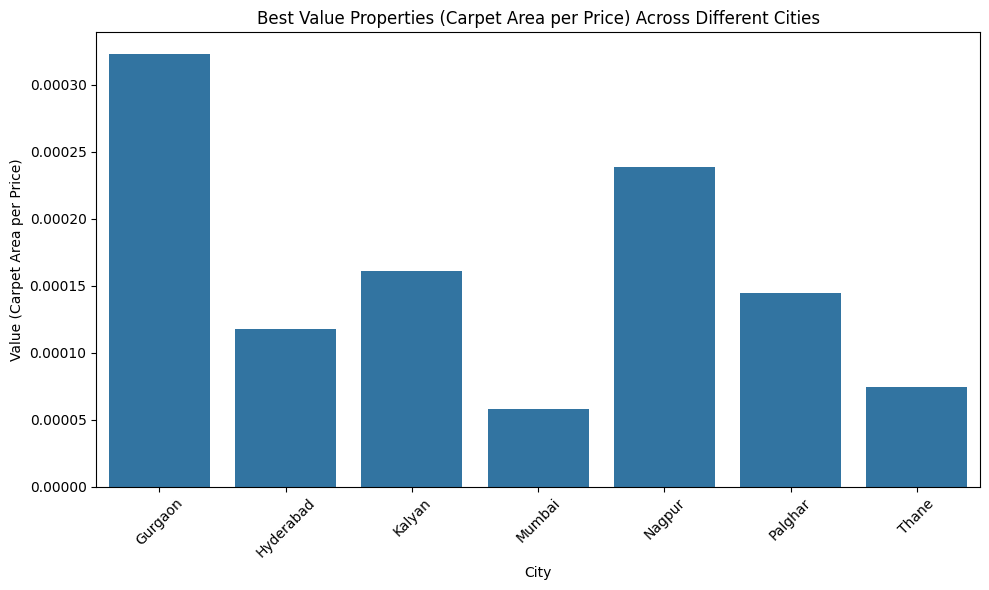

In [35]:

real_estate_data['Value (Carpet Area per Price)'] = real_estate_data['Carpet Area'] / real_estate_data['Price']

value_data = real_estate_data.dropna(subset=['Carpet Area', 'Price', 'Value (Carpet Area per Price)'])

city_value_summary = value_data.groupby('City').agg({
    'Value (Carpet Area per Price)': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Value (Carpet Area per Price)', data=city_value_summary)
plt.title('Best Value Properties (Carpet Area per Price) Across Different Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Question 6

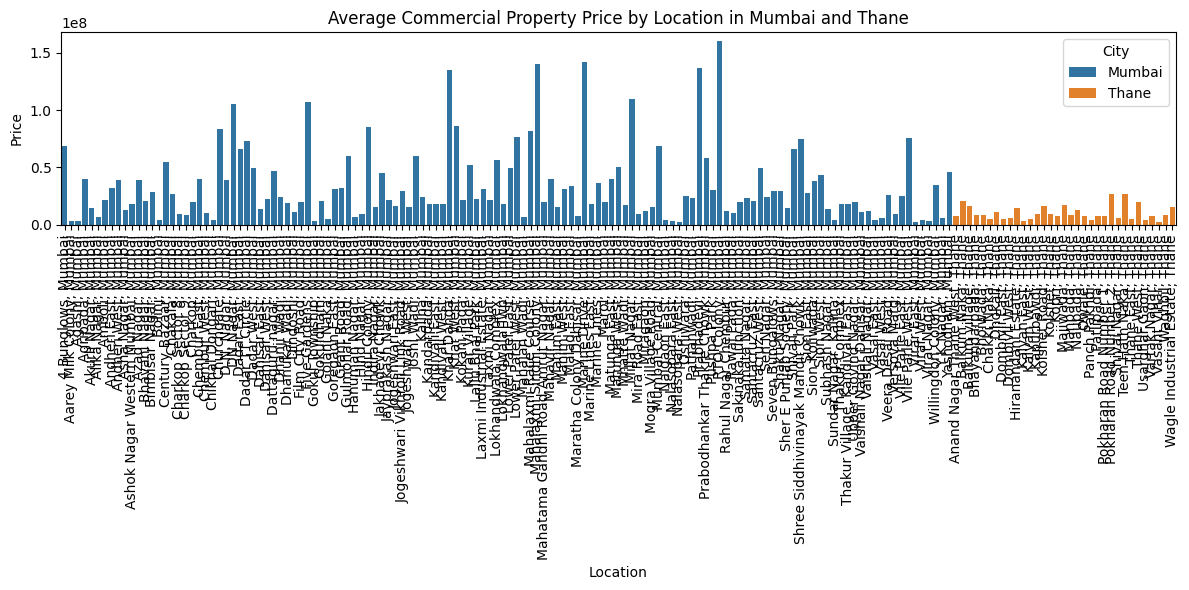

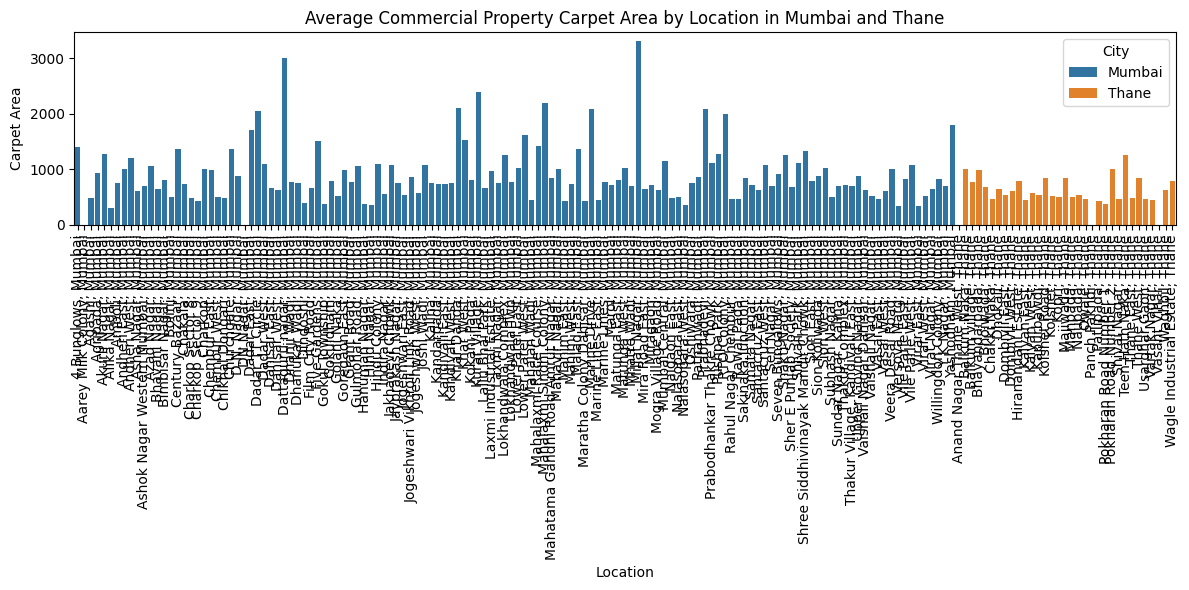

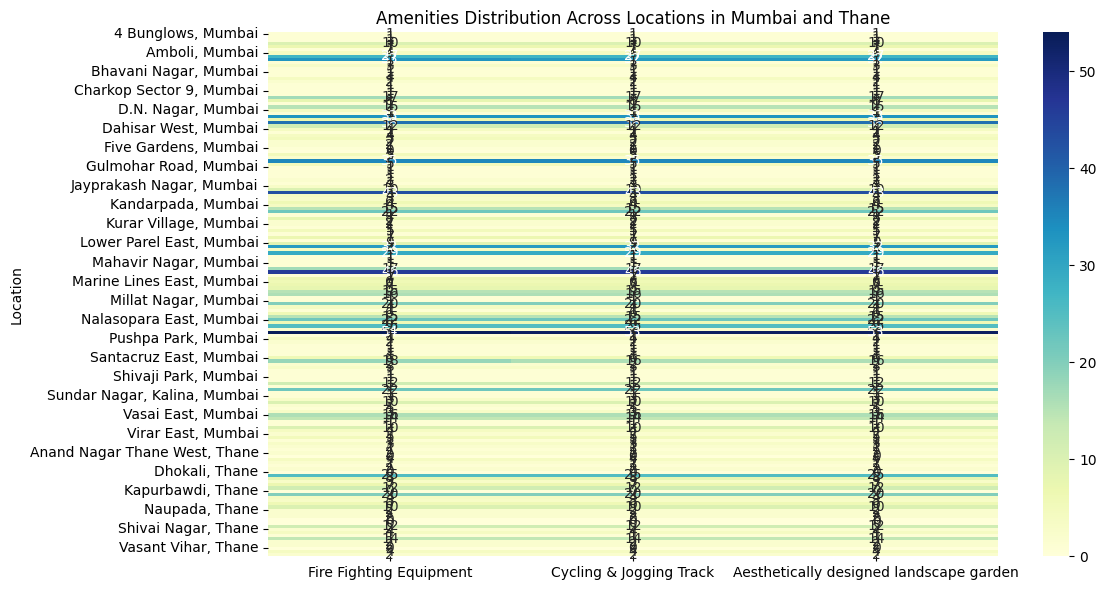

In [36]:
commercial_data = real_estate_data[
    (real_estate_data['City'].isin(['Mumbai', 'Thane'])) & (real_estate_data['Commercial'] == 'Y')
]

commercial_data = commercial_data[['City', 'Price', 'Carpet Area', 'Location', 'Fire Fighting Equipment', 
                                   'Cycling & Jogging Track', 'Aesthetically designed landscape garden']]

commercial_data['Price'] = pd.to_numeric(commercial_data['Price'], errors='coerce')
commercial_data['Carpet Area'] = pd.to_numeric(commercial_data['Carpet Area'], errors='coerce')

location_summary = commercial_data.groupby(['City', 'Location']).agg({
    'Price': 'mean',
    'Carpet Area': 'mean',
    'Fire Fighting Equipment': 'sum',
    'Cycling & Jogging Track': 'sum',
    'Aesthetically designed landscape garden': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Price', hue='City', data=location_summary)
plt.title('Average Commercial Property Price by Location in Mumbai and Thane')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Carpet Area', hue='City', data=location_summary)
plt.title('Average Commercial Property Carpet Area by Location in Mumbai and Thane')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(location_summary[['Fire Fighting Equipment', 'Cycling & Jogging Track', 'Aesthetically designed landscape garden']].set_index(location_summary['Location']),
            annot=True, cmap="YlGnBu", fmt="d")
plt.title('Amenities Distribution Across Locations in Mumbai and Thane')
plt.tight_layout()
plt.show()


## Question 7

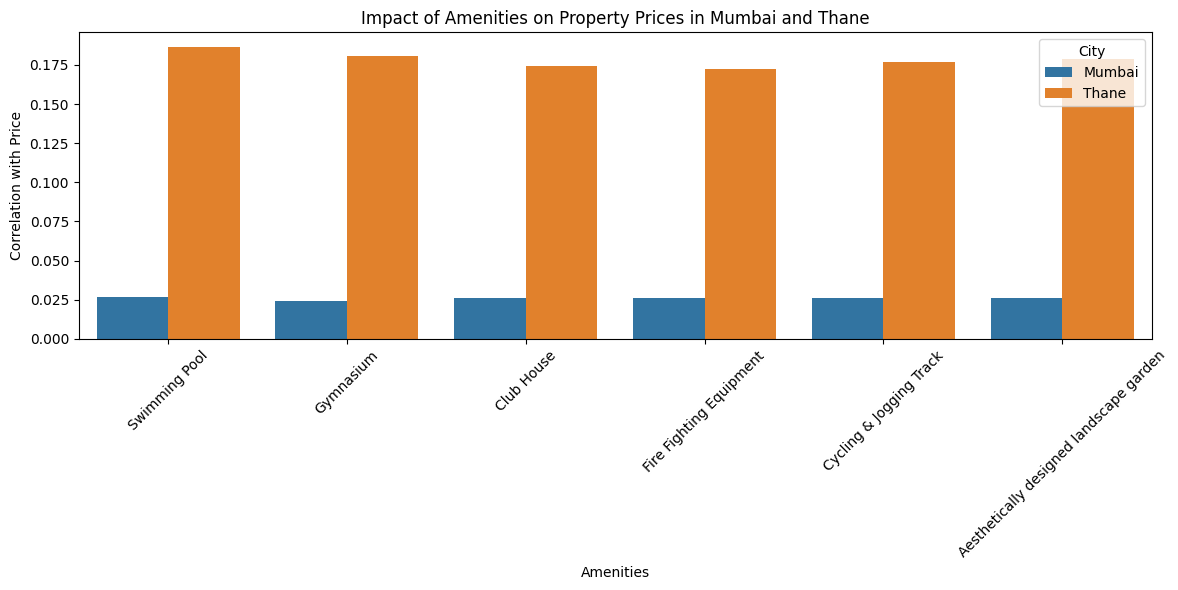

In [37]:

amenities_impact_data = real_estate_data[
    real_estate_data['City'].isin(['Mumbai', 'Thane'])
][['City', 'Price', 'Swimming Pool', 'Gymnasium', 'Club House', 'Fire Fighting Equipment', 
   'Cycling & Jogging Track', 'Aesthetically designed landscape garden']]

amenities_impact_data['Price'] = pd.to_numeric(amenities_impact_data['Price'], errors='coerce')

amenities_correlation = amenities_impact_data.groupby('City').corr(method='pearson')['Price'].reset_index()

amenities_correlation_filtered = amenities_correlation[amenities_correlation['level_1'].isin(['Swimming Pool', 'Gymnasium', 'Club House', 'Fire Fighting Equipment', 
                                                                                               'Cycling & Jogging Track', 'Aesthetically designed landscape garden'])]

plt.figure(figsize=(12, 6))
sns.barplot(x='level_1', y='Price', hue='City', data=amenities_correlation_filtered)
plt.title('Impact of Amenities on Property Prices in Mumbai and Thane')
plt.xticks(rotation=45)
plt.ylabel('Correlation with Price')
plt.xlabel('Amenities')
plt.tight_layout()
plt.show()